#  Step 1: Setup Colab & Install Dependencies

In [1]:
# Clone YOLOv5 dari GitHub resmi Ultralytics
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.56 MiB | 28.88 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:0

# Step 2: Upload & Ekstrak Dataset data2.zip di Google Colab

In [2]:
# Step 2: Upload & Extract Dataset
from google.colab import files
import zipfile
import os

# Upload zip file
#uploaded = files.upload()  # <-- Pilih file 'data2.zip' dari lokal

# Ekstrak zip ke folder /content/data2/
with zipfile.ZipFile("/content/data2.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/data2")

# Tampilkan isi direktori hasil ekstrak untuk verifikasi
print("\nIsi folder /content/data2:")
for path, dirs, files in os.walk("/content/data2"):
    print(f"{path} -> {files}")


Isi folder /content/data2:
/content/data2 -> ['notes.json', 'classes.txt']
/content/data2/labels -> ['d093da71-10_221.txt', '01228fec-100_40.txt', '573fe287-20250609_223533_3_277.txt', '54977902-10_78.txt', '46d42fb1-20250609_223533_2_122.txt', 'b7ca3bc3-20250609_223533_2_074.txt', '03706d95-100_568.txt', '377a5b67-20250609_230020_3_118.txt', 'e9e2f06f-10_210.txt', '40205356-20250609_230020_221.txt', '63bb2bd0-100_4.txt', 'c7147e77-20250609_223533_3_061.txt', '03d4af09-50_125.txt', 'ef6e01d4-20250609_230020_124.txt', '65cc24f2-20250609_223533_041.txt', 'dae78e3e-20250609_223533_209.txt', '06a7cc44-20250609_230020_3_061.txt', '4222b42f-20_448.txt', '40283437-5_124.txt', 'c8bf0306-10_342.txt', 'a88a75d1-2_317.txt', '8fc13d07-20250609_223533_101.txt', '95c63910-50_485.txt', 'f7e0785d-2_509.txt', '9d92d183-20_220.txt', '6f51aa2c-5_304.txt', 'f723430d-10_305.txt', 'a5b46e31-10_162.txt', '9a41de80-100_88.txt', 'faa25a80-20250609_230020_2_039.txt', 'c7401127-20250609_230020_2_290.txt', 'b2c6

# Step 3: Buat File data.yaml Secara Otomatis



In [3]:
# Step 3: Generate data.yaml
import yaml
import os

def create_data_yaml(path_to_classes_txt, output_yaml_path, base_data_path='/content/data2'):
    # Baca file classes.txt
    if not os.path.exists(path_to_classes_txt):
        print(f"File {path_to_classes_txt} tidak ditemukan!")
        return

    with open(path_to_classes_txt, 'r') as f:
        class_list = [line.strip() for line in f if line.strip()]

    num_classes = len(class_list)

    data_yaml = {
        'path': base_data_path,
        'train': 'images',         # dalam /content/data2/images
        'val': 'images',           # bisa kamu pisah jika punya val set sendiri
        'nc': num_classes,
        'names': class_list
    }

    with open(output_yaml_path, 'w') as outfile:
        yaml.dump(data_yaml, outfile, sort_keys=False)

    print(f"✅ data.yaml berhasil dibuat di {output_yaml_path}")

# Panggil fungsi
create_data_yaml(
    path_to_classes_txt='/content/data2/classes.txt',
    output_yaml_path='/content/data.yaml'
)

# Cek isi file
print('\n📄 Isi data.yaml:')
!cat /content/data.yaml


✅ data.yaml berhasil dibuat di /content/data.yaml

📄 Isi data.yaml:
path: /content/data2
train: images
val: images
nc: 7
names:
- 100k
- 10k
- 1k
- 20k
- 2k
- 50k
- 5k


#  Step 4: Clone YOLOv5 dan Struktur Folder

In [4]:
# Step 4: Clone YOLOv5 dan masuk ke direktori
!git clone https://github.com/ultralytics/yolov5
%cd yolov5

# Install dependensi dari requirements.txt
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17493, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 17493 (delta 2), reused 0 (delta 0), pack-reused 17486 (from 2)
Receiving objects: 100% (17493/17493), 16.56 MiB | 30.22 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5/yolov5


In [5]:
import os, random, shutil
from pathlib import Path

# Path awal
base_path = '/content/data2'
images_path = Path(f'{base_path}/images')
labels_path = Path(f'{base_path}/labels')

# Path tujuan split
for split in ['train', 'val']:
    os.makedirs(f'{base_path}/{split}/images', exist_ok=True)
    os.makedirs(f'{base_path}/{split}/labels', exist_ok=True)

# Ambil semua file gambar
image_files = list(images_path.glob('*.jpg')) + list(images_path.glob('*.png'))
random.shuffle(image_files)

# Tentukan rasio split
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)
train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Copy file ke folder baru
def copy_files(files, split):
    for img_path in files:
        label_path = labels_path / img_path.with_suffix('.txt').name
        shutil.copy(img_path, f'{base_path}/{split}/images/')
        if label_path.exists():
            shutil.copy(label_path, f'{base_path}/{split}/labels/')

copy_files(train_files, 'train')
copy_files(val_files, 'val')
print(f"✅ Selesai split: {len(train_files)} train, {len(val_files)} val")


✅ Selesai split: 412 train, 104 val


In [6]:
new_data_yaml = """
path: /content/data2
train: train/images
val: val/images
nc: 7
names:
  - 100k
  - 10k
  - 1k
  - 20k
  - 2k
  - 50k
  - 5k
"""

with open('/content/data.yaml', 'w') as f:
    f.write(new_data_yaml.strip())

print("✅ data.yaml berhasil diperbarui!")
!cat /content/data.yaml


✅ data.yaml berhasil diperbarui!
path: /content/data2
train: train/images
val: val/images
nc: 7
names:
  - 100k
  - 10k
  - 1k
  - 20k
  - 2k
  - 50k
  - 5k

# Step 5: Training Model YOLOv5 dengan Dataset

In [7]:
!python train.py \
  --img 512 \
  --batch 32 \
  --epochs 40 \
  --data /content/data.yaml \
  --weights yolov5s.pt \
  --project runs/train \
  --name cash_eye_gpu_fast \
  --exist-ok


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-12 15:53:47.343996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749743627.593752    2987 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749743627.662704    2987 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

In [10]:
from google.colab import files
files.download('/content/yolov5/yolov5/runs/train/cash_eye_gpu_fast/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

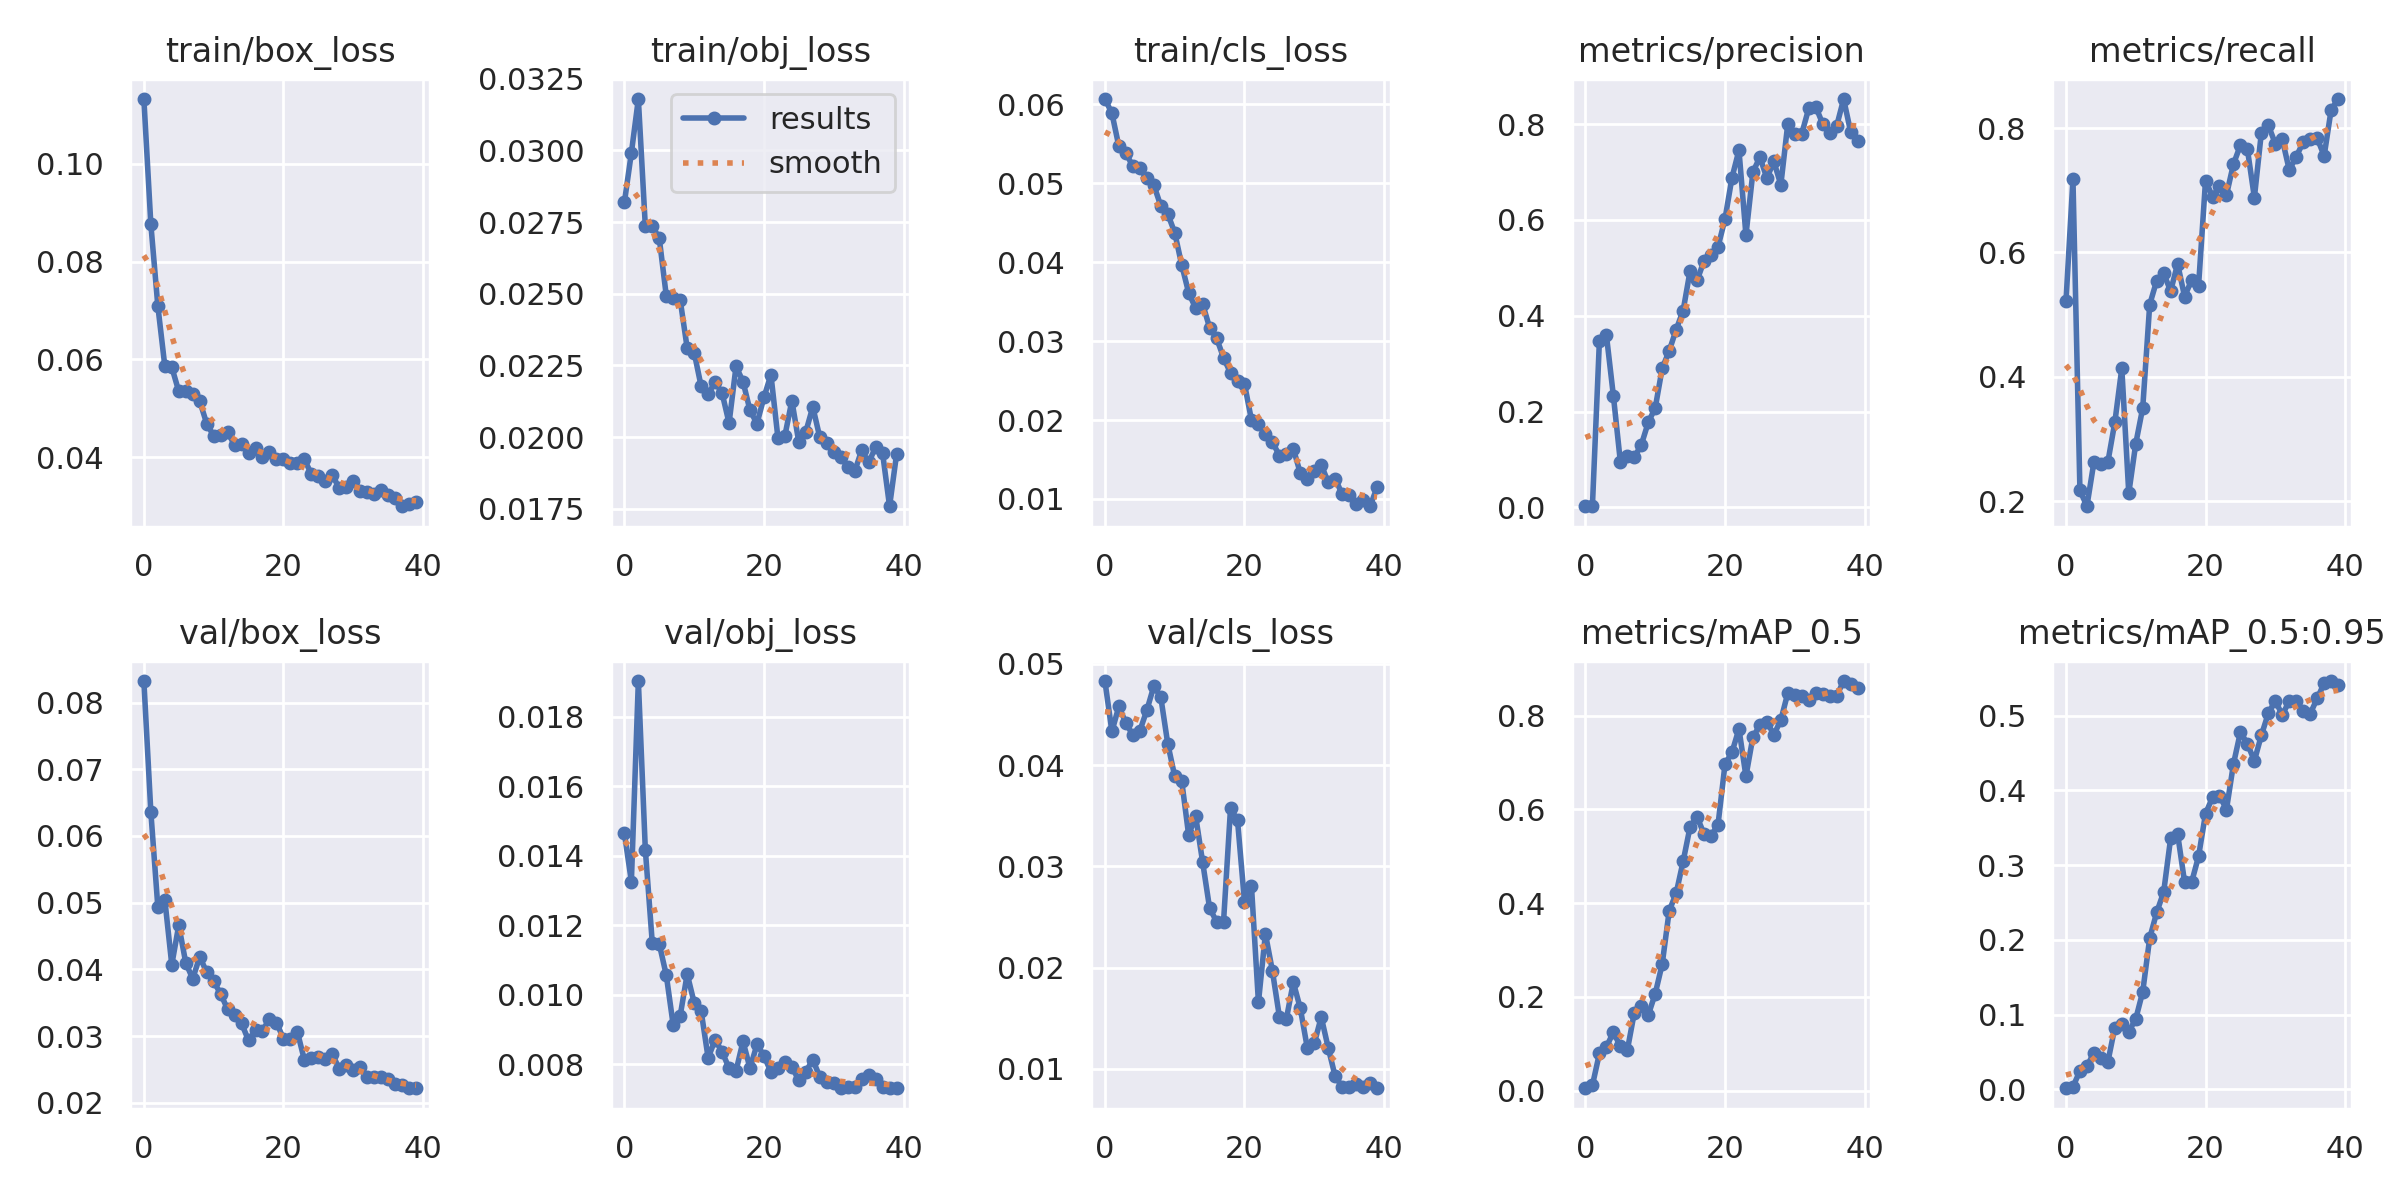

In [11]:
from IPython.display import Image
Image(filename='runs/train/cash_eye_gpu_fast/results.png', width=800)

 # 6. Evaluate + Inference + Visualisasi Hasil

In [12]:
!python val.py --weights runs/train/cash_eye_gpu_fast/weights/best.pt --data /content/data.yaml --img 640

val: data=/content/data.yaml, weights=['runs/train/cash_eye_gpu_fast/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/data2/val/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:05<00:00,  1.47s/it]
                   all        104        144      0.737      0.823      0.841      0.501
                  100k        104         12       0.61      0.917      0.786      0.406
                   10k      

In [17]:
!python detect.py --weights runs/train/cash_eye_gpu_fast/weights/best.pt --img 640 --source /content/sample.jpg --data /content/data.yaml

detect: weights=['runs/train/cash_eye_gpu_fast/weights/best.pt'], source=/content/sample.jpg, data=/content/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/sample.jpg: 640x640 1 50k, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 126.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


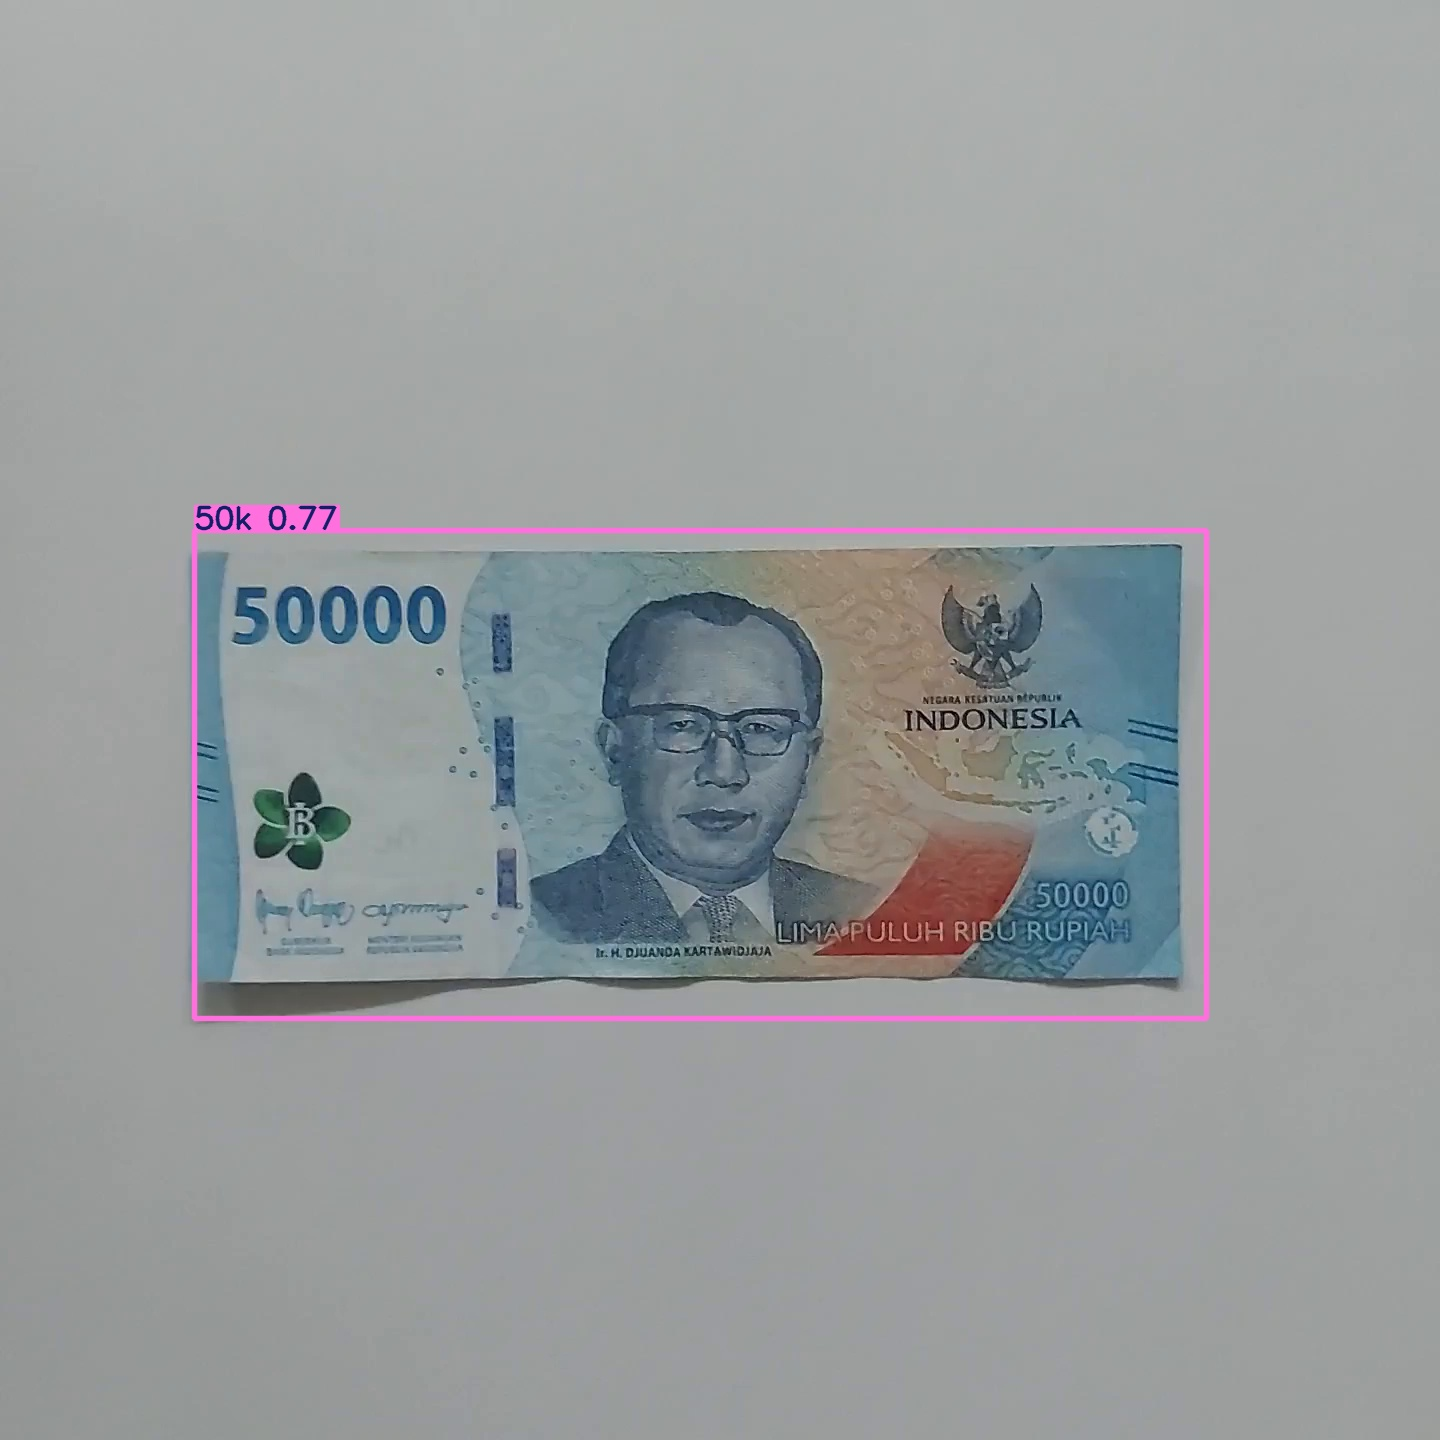

In [24]:
from IPython.display import Image, display
display(Image(filename='runs/detect/exp2/sample.jpg', width=600))

In [22]:
!python detect.py --weights runs/train/cash_eye_gpu_fast/weights/best.pt --source /content/sample2.jpg --data /content/data.yaml

detect: weights=['runs/train/cash_eye_gpu_fast/weights/best.pt'], source=/content/sample2.jpg, data=/content/data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/sample2.jpg: 384x640 1 2k, 29.1ms
Speed: 0.5ms pre-process, 29.1ms inference, 148.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


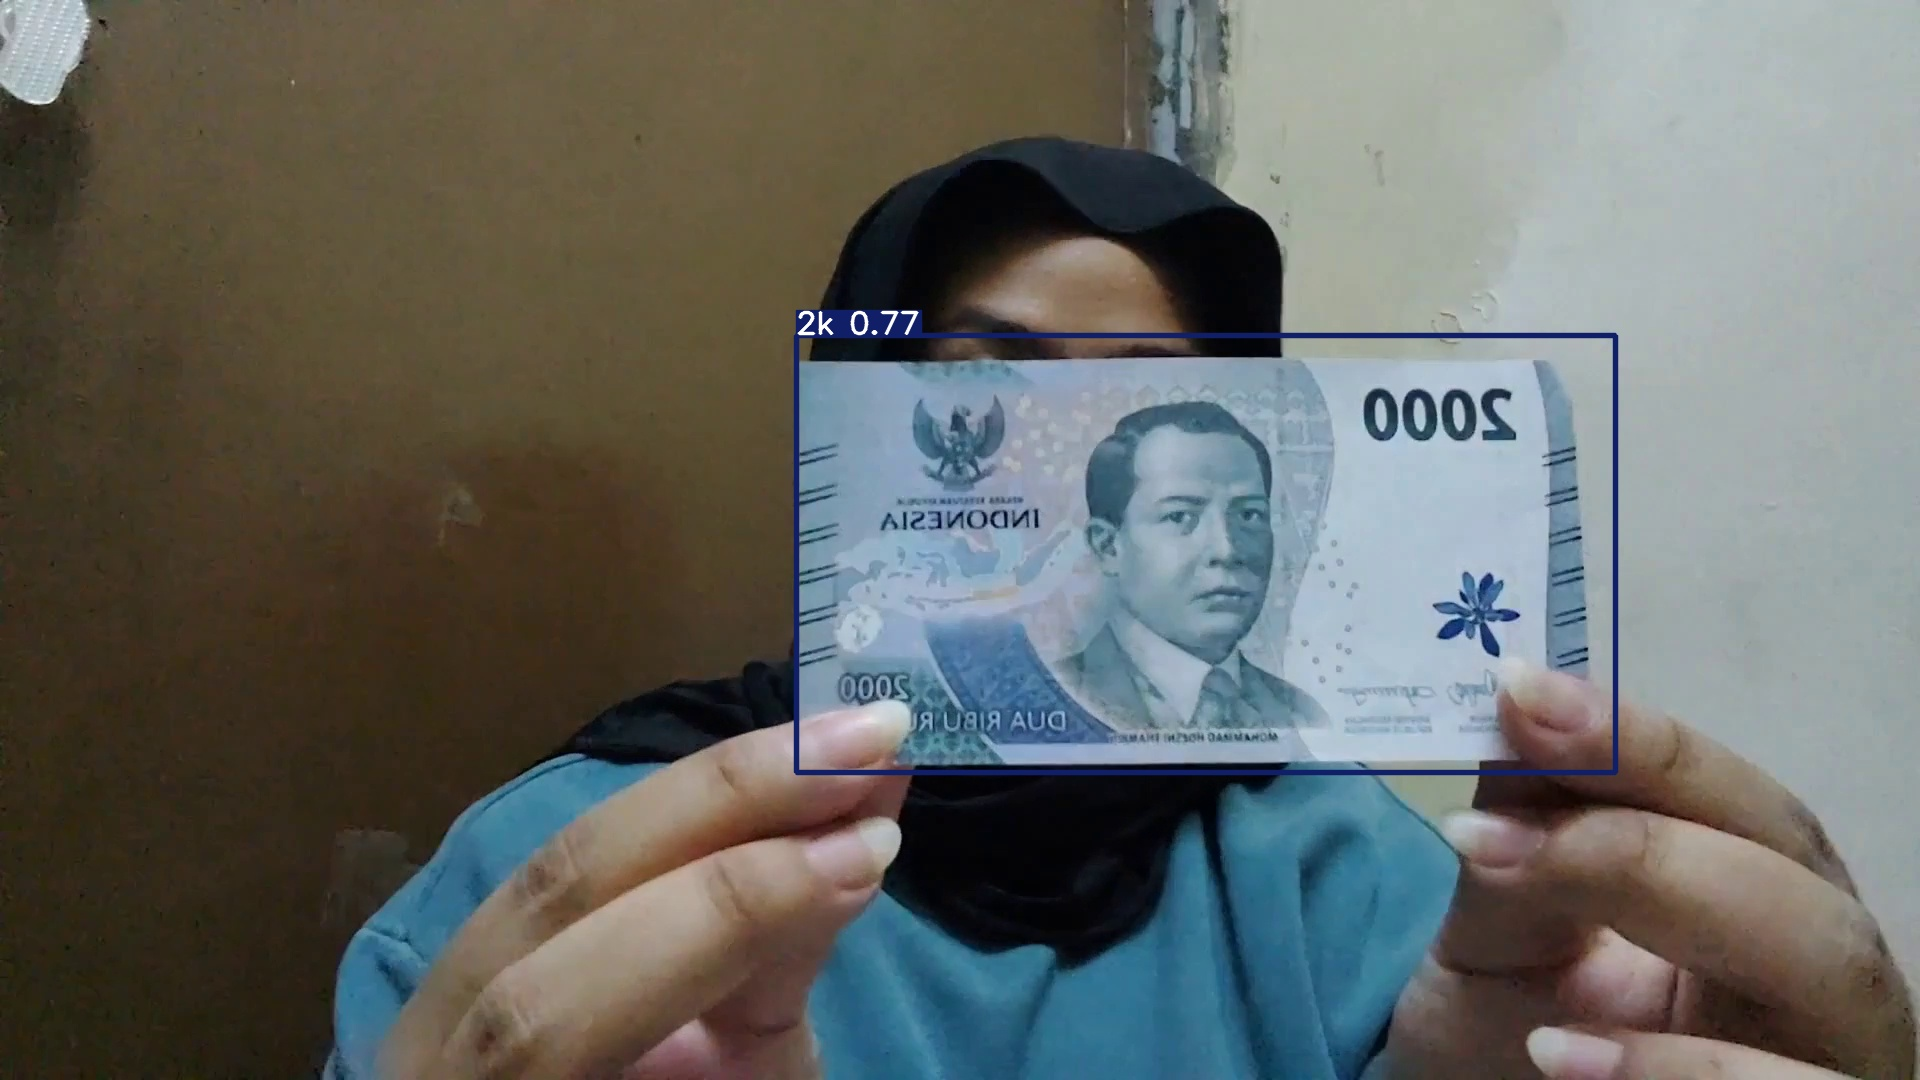

In [25]:
from IPython.display import Image, display
display(Image(filename='runs/detect/exp4/sample2.jpg', width=600))

# Fine-Tune dengan Transfer Learning + Freeze Backbone (lebih cepat & stabil)

In [26]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 30 \
  --data /content/data.yaml \
  --weights runs/train/cash_eye_gpu_fast/weights/best.pt \
  --name cash_eye_finetune_freeze \
  --freeze 10

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-12 16:21:58.050158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749745318.070526   10315 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749745318.076827   10315 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=runs/train/cash_eye_gpu_fast/weights/best.pt, cfg=, data=/conte

In [27]:
!python val.py \
  --data /content/data.yaml \
  --weights runs/train/cash_eye_finetune_freeze/weights/best.pt \
  --img 640

val: data=/content/data.yaml, weights=['runs/train/cash_eye_finetune_freeze/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/data2/val/labels.cache... 104 images, 0 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 4/4 [00:06<00:00,  1.52s/it]
                   all        104        144      0.809      0.799      0.867      0.533
                  100k        104         12      0.725       0.75      0.861      0.479
                   10

In [28]:
!python train.py \
  --img 640 \
  --batch 16 \
  --epochs 30 \
  --data /content/data.yaml \
  --weights runs/train/cash_eye_gpu_fast/weights/best.pt \
  --name cash_eye_finetune_nofreeze

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-06-12 16:49:36.672719: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749746976.706570   17187 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749746976.716818   17187 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=runs/train/cash_eye_gpu_fast/weights/best.pt, cfg=, data=/conte

#  Script Python sederhana untuk inference

In [30]:
%cd /content/yolov5


/content/yolov5


In [36]:
!python detect.py \
  --weights /content/yolov5/yolov5/runs/train/cash_eye_finetune_nofreeze/weights/best.pt \
  --source /content/sample.jpg \
  --img 640 \
  --conf 0.25 \
  --save-txt \
  --save-conf \
  --project inference_output \
  --name result_nofreeze \
  --exist-ok



detect: weights=['/content/yolov5/yolov5/runs/train/cash_eye_finetune_nofreeze/weights/best.pt'], source=/content/sample.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=inference_output, name=result_nofreeze, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7029004 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/sample.jpg: 640x640 1 50k, 11.5ms
Speed: 0.6ms pre-process, 11.5ms inference, 176.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to inference_output/result_nofreeze
1 labels saved to inference_output/result_nofreeze/labels


In [38]:
from google.colab import files
files.download('/content/yolov5/yolov5/runs/train/cash_eye_finetune_nofreeze/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>